<a href="https://colab.research.google.com/github/josmyrose/Assignment1/blob/main/casestudypreprocssing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the dataset into python environment


In [2]:
df=pd.read_csv('/content/drive/MyDrive/titanic_dataset.csv')

In [3]:
#Details of Dataset

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

2. Make ‘PassengerId’ as the index column


In [6]:
#The index attribute is used to display the row labels of a data frame object
df.set_index('PassengerId',inplace= True)

In [7]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Check the basic details of the dataset

In [8]:

#No.of rows and columns in the dataset
df.shape

(891, 11)

In [9]:
#Get the details of dataset
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


4.Fill in all the missing values present in all the columns in the dataset

In [10]:
# Find the columns having null values

In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
#To drop Name and Ticket
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [13]:
#Find datatype of columns ,its used for knowing datatype of null values
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

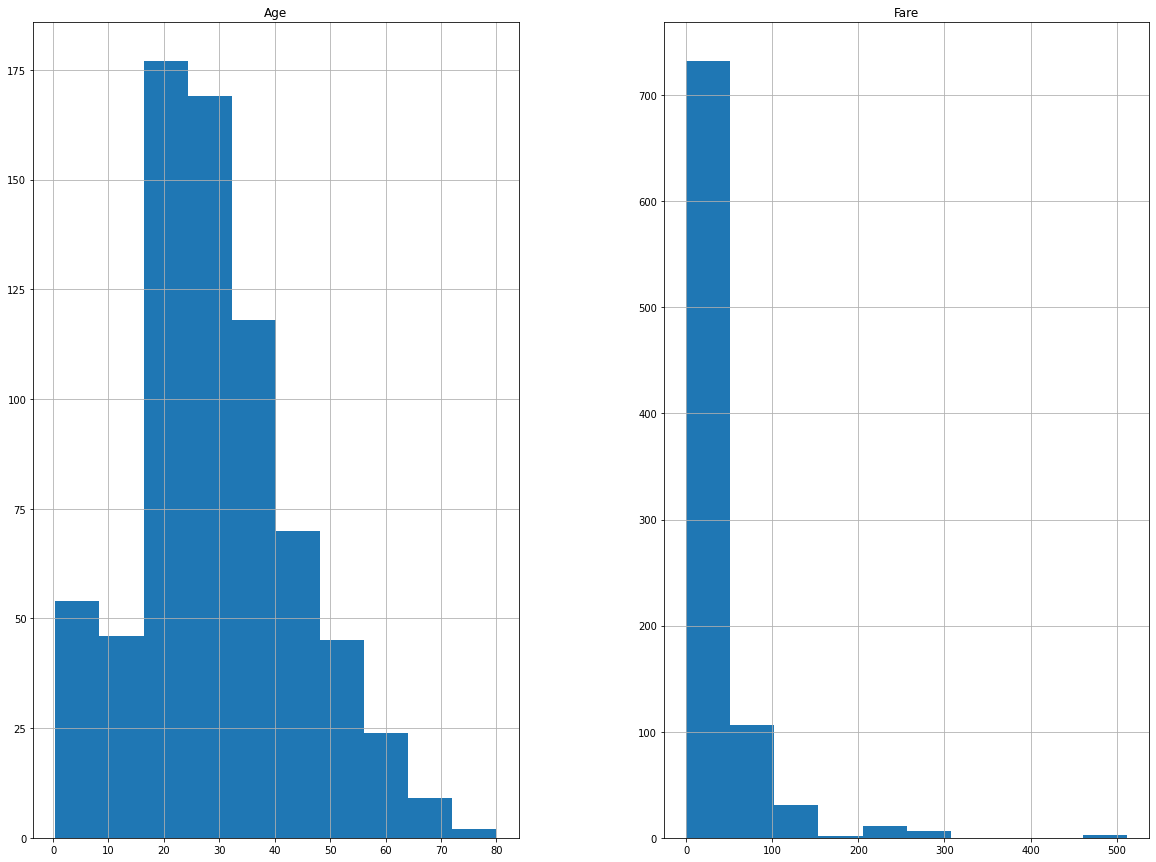

In [14]:
dgraph=df.select_dtypes(include=['float'])
dgraph.hist(figsize=(20,15))
plt.show()


The graph shows that people having age between 20 and 3o.The null field can be filled with mean of age.

In [15]:
medianage=df.groupby(['Pclass'])['Age'].median

In [16]:
df['Age']=df['Age'].fillna(medianage)

In [17]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

5.Check and handle outliers in at least 3 columns in the dataset

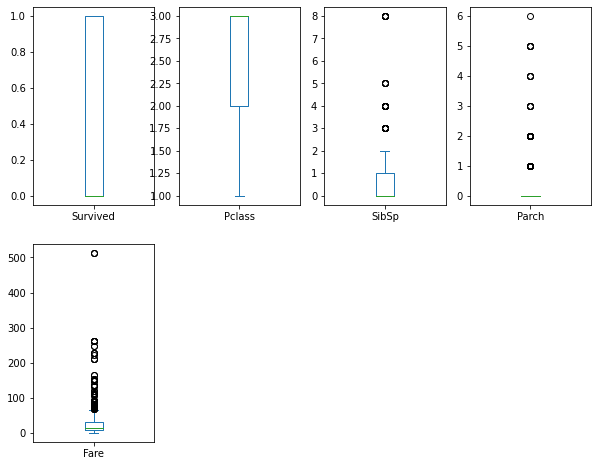

In [18]:
df.plot(kind ='box',subplots =True,layout = (2,4), sharey =False, figsize =(10,8))
plt.show()

Here Sibsp,Parch and Fare have outliers .

In [19]:
#df['Age']=df['Age'].astype('Int64')

Text(0.5, 1.0, 'find outliers in beer servings')

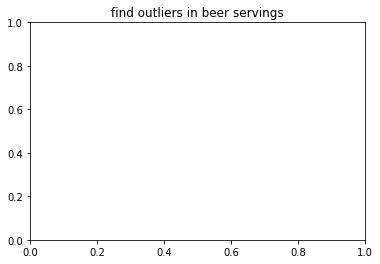

In [20]:
#plt.boxplot(df['Age'].astype(int))
plt.title('find outliers in beer servings')

Handling outliers 

In [21]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')

In [22]:
Q2

0.0

In [23]:
q1= df['Fare'].quantile(.25)
q3 = df['Fare'].quantile(.75)
iqr = q3 -q1
up = q3 +1.5*iqr
print("q3,iqr,up\n",q3,iqr,up)
df[df['Fare']>up].groupby(['Survived','Sex'])['Fare'].describe()
q3,iqr,up

q3,iqr,up
 31.0 23.0896 65.6344


(31.0, 23.0896, 65.6344)

In [24]:

df[df['Fare']>up].groupby(['Survived','Sex'])['Fare'].describe()

count        mean         std      min        25%        50%  \
Survived Sex                                                                    
0        female    5.0  102.350000   44.913250  69.5500  69.550000   69.55000   
         male     32.0  114.791403   64.406333  66.6000  73.500000   79.42500   
1        female   65.0  130.020189   75.776007  66.6000  79.650000   93.50000   
         male     14.0  160.388700  150.850639  76.7292  83.669775  100.98125   

                        75%       max  
Survived Sex                           
0        female  151.550000  151.5500  
         male    118.864575  263.0000  
1        female  151.550000  512.3292  
         male    130.237500  512.3292

Among the records with outlier fare values , fare is a factor for seggregating the survived status .So we do not drop the outliers from dataset.

6.Do min max scaling on the feature set (Take ‘Survived’ as target)

In [25]:
df1=df.drop('Survived',axis=1)

In [ ]:
# Standardscaler function is in the preprocessing of sklearn
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler()
st=minmax.fit_transform(df1)